In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# PLASTICA

Text(0.5, 1.0, 'Sodio con plastica BGO')

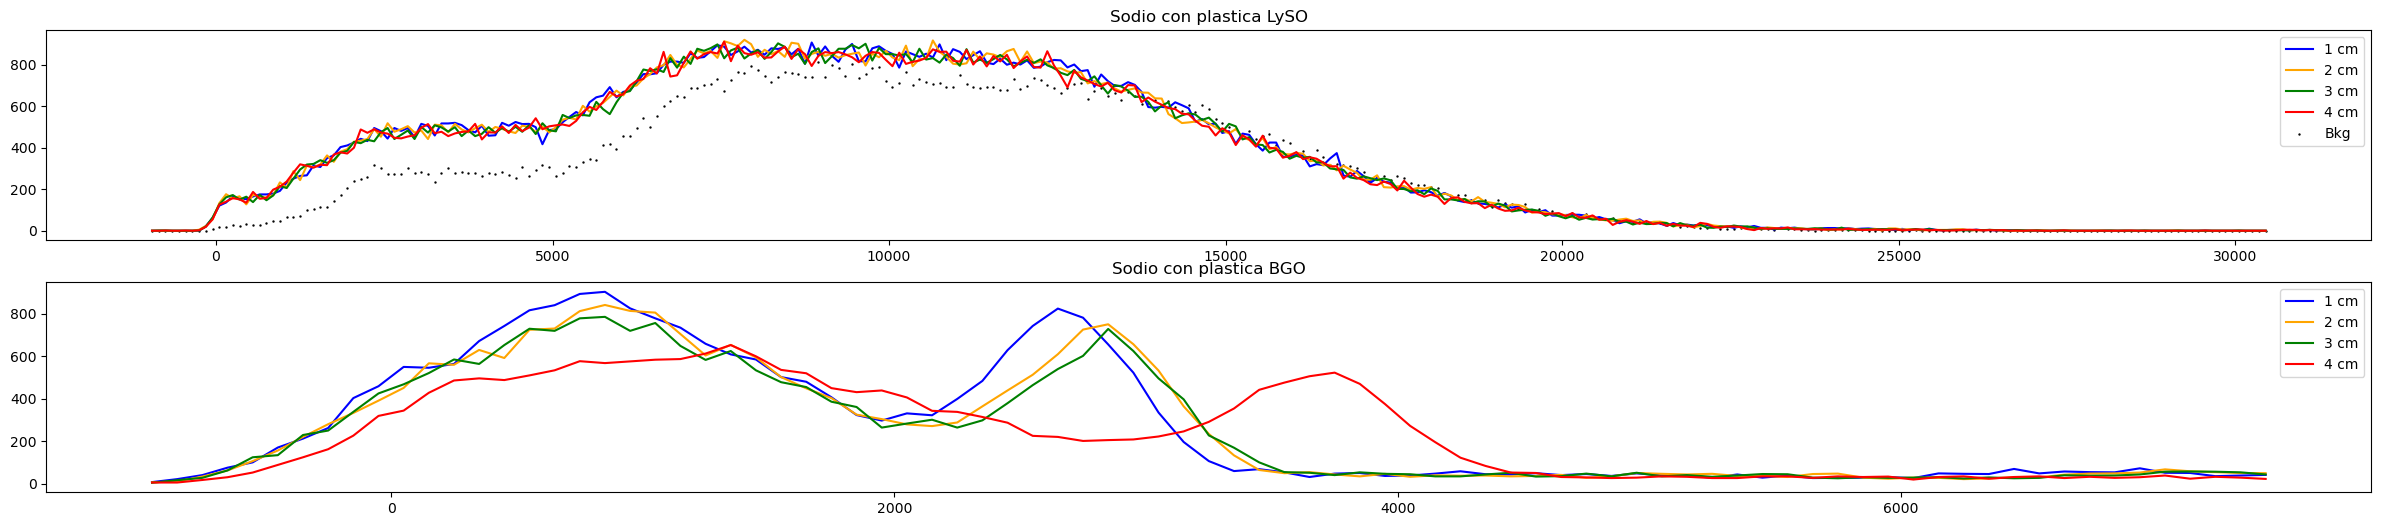

In [2]:
#prendo dati di LySO e fondo lyso
#spiego nome: sodio_lyso_1cm_plastica
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], bkg_L['Counts'][start_index:end_index_L], label = 'Bkg', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

Text(0.5, 1.0, 'Sodio con plastica BGO')

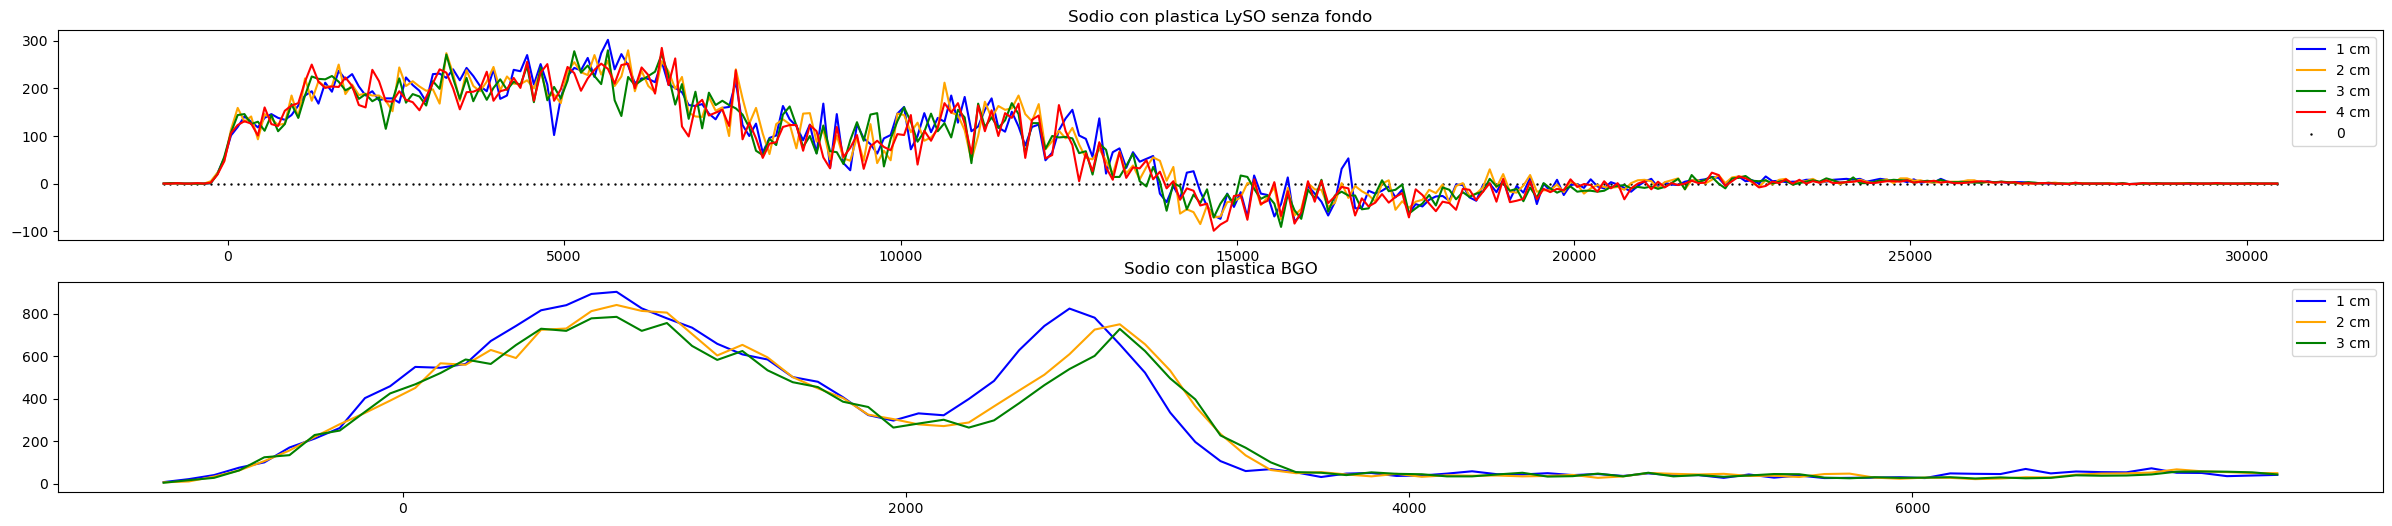

In [3]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
a = np.zeros(len(Na_L_1_nobkg_p))
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], a, label = '0', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

# Alluminio

Text(0.5, 1.0, 'Sodio con alluminio BGO')

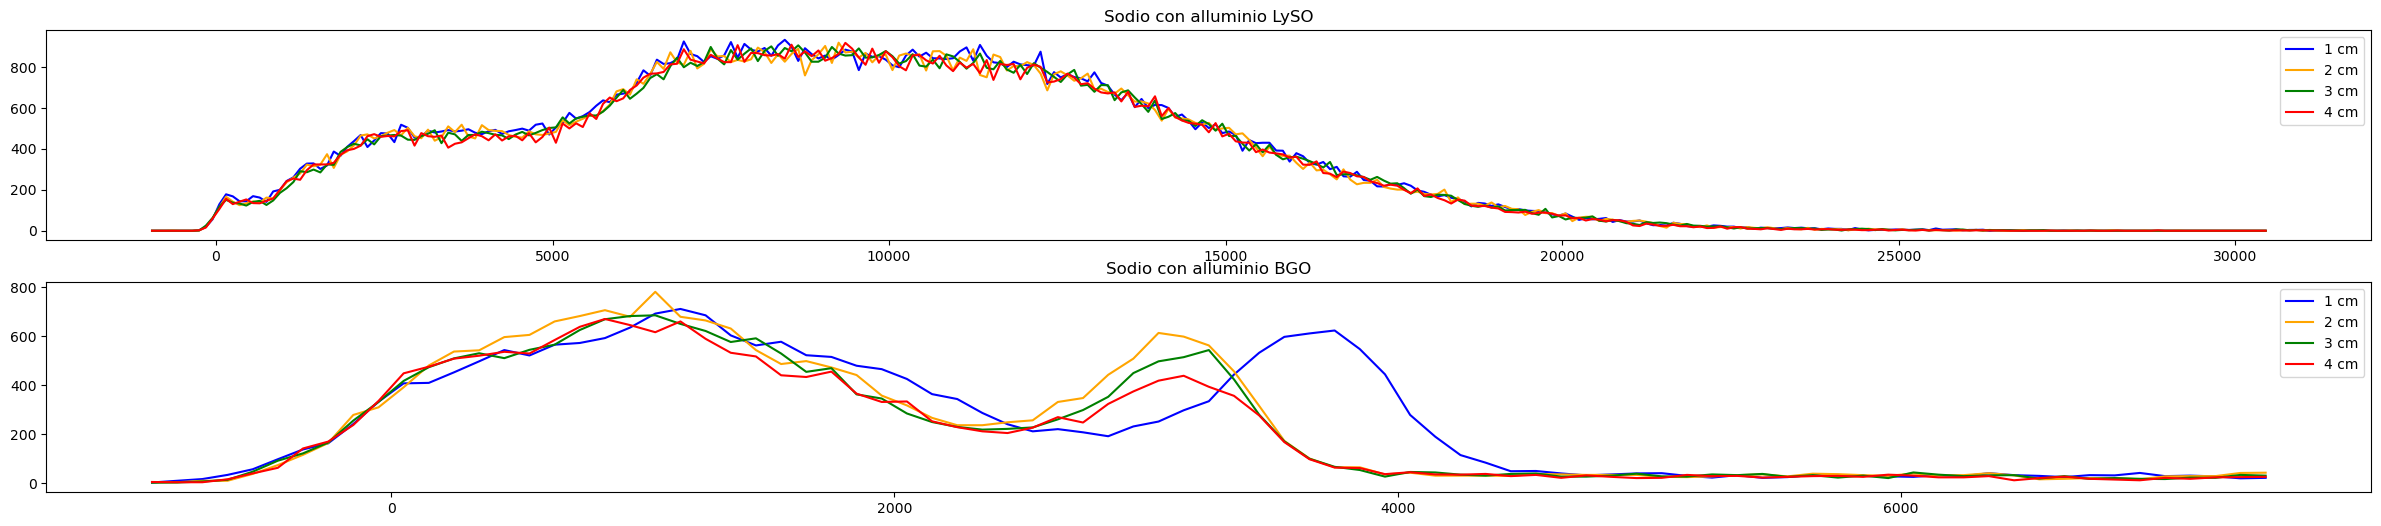

In [4]:
#spiego nome: sodio_lyso_1cm_alluminio
Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
Na_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')
axes[1].plot(Na_B_1_al['ADC'][start_index:end_index_B], Na_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_al['ADC'][start_index:end_index_B], Na_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_al['ADC'][start_index:end_index_B], Na_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_al['ADC'][start_index:end_index_B], Na_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con alluminio BGO')

In [ ]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!

## fit BGO

In [ ]:
si1 = 99 - 65
ei1 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_al['ADC'][si1 : ei1], Na_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Na_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol3, mu = 3500, sigma = 400, a = 400, b = 0, c = 0, d = 0, cost = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si2 = 94 - 65
ei2 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_al['ADC'][si2 : ei2], Na_B_2_al['Counts'][si2 : ei2], np.array(np.sqrt(Na_B_2_al['Counts'][si2 : ei2])),
                                      gauss_pol3, mu = 3500, sigma = 400, a = 400, b = 0, c = 0, d = 0, cost = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si3 = 97 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_al['ADC'][si3 : ei], Na_B_3_al['Counts'][si3 : ei], np.array(np.sqrt(Na_B_3_al['Counts'][si3 : ei])),
                                      gauss_pol3, mu = 4000, sigma = 400, a = 400, b = 0, c = 0, d = 0, cost = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si4 = 96 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_al['ADC'][si4 : ei], Na_B_4_al['Counts'][si4 : ei], np.array(np.sqrt(Na_B_4_al['Counts'][si4 : ei])),
                                      gauss_pol3, mu = 3500, sigma = 400, a = 400, b = 0, c = 0, d = 0, cost = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

print(mu1, mu2, mu3, mu4)

In [37]:
print((mu1-mu2)/math.sqrt(sig1**2+sig2**2), np.mean([mu1, mu2, mu3, mu4]))
print('area gaussiane /np.sqrt(2*pi):', a1*sig1, a2*sig2, a3*sig3, a4*sig4 )
# plt.plot([1, 2, 3, 4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4])

1.4086761647377073 3265.125591366995
area gaussiane /np.sqrt(2*pi): 154236.5613958929 141054.22713963935 114988.57676547114 92760.96784284431


In [45]:
def prop_err_mol(a, b, sa, sb):
    return np.sqrt(sa**2 * b**2 + sb**2 * a**2) 
def exp(x, a, b, ):
    return a * np.exp(-b * x) 

In [46]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.532 (χ²/ndof = 1.8)      │              Nfcn = 404              │
│ EDM = 2.57e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   188e3   │    8e3    │            │            │         │         │       │
│ 1 │ b    │   0.168   │   0.016   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  6.12e+07 115.16731 │
│ b │ 115.16731  0.000269 │
└───┴─────────────────────┘